In [1]:
########## lets import numpy and pandas libraries for data manipulation and to find patterns inside data#####

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # this is used to ignore warnings in output of jupiter console

In [3]:
#loading the dataset from other path to jupiter and reading the data#

data1 = pd.read_csv(r'C:\Users\LENOVO\Downloads\New folder\Diabetes.csv')
# storing all the column names in one object and can restore when required#
columns_original = data1.columns
columns_original

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
#### As we had already loaded dataset using pandas ,let us check whether we can retrive the data#######
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
#### checking Number of rows and columns from the given data set#####
data1.shape

(768, 9)

In [6]:
####### let us check the statistics of the our dataset where it shows count,max,min, and also can find if there are any missing values#######

data1.describe()

  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,761.000000,761.000000,746.000000,754.00000,762.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.13435,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.926330,15.902731,116.102469,7.56570,0.332328,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.40000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.05000,0.370500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.60000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [7]:
###########################From the above statistics of data , as per count for some of features have missing data that is Bloodpressure,skinthickness,InsulinBMI,DiabetesPedigreeFunction and inaddition to that we can also observe that some of the features have 0 data #########

#### Checking null values from each column######
data1.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                7
SkinThickness                7
Insulin                     22
BMI                         14
DiabetesPedigreeFunction     6
Age                          0
Outcome                      0
dtype: int64

In [8]:
#---Since all the features here are numeric data type we can replace null values with mean of each column using SimpleImputer###

 # Using SimpleImputer to replace missing values with mean of each column####
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan,strategy='mean')#replacing null values with mean of each column#
imputer2 = SimpleImputer(missing_values=0,strategy='mean') #replacing all 0's with mean of each column except 'Pregnancies' and 'outcome'
imputer1 = imputer1.fit(data1)#Feeding data using imputer
data1 = imputer1.transform(data1) # resultant data after transforming all null values with mean of each column
##### Converting ndarray in to dataframe
data1 = pd.DataFrame(data1)
###Assigning previous columns stored in to new data frame##
data1.columns = columns_original

In [9]:
#let us check with describe method to see if there are any null values after using simple imputer##
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.134350,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.839767,15.829996,114.425261,7.496334,0.331026,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,48.500000,32.134350,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
########################################################################################################################
# From above we can observe that there are no any missing values, However there are some columns where data cannot be zero.Glucose, BloodPressure,SkinThickness, Insulin and BMI all are numerical data which cannot be zero.
#we will fill the zeros with mean of each column except Pregnancies and out come#
#####################################################################

data1['Glucose'] = imputer2.fit_transform(data1[['Glucose']])
data1['BloodPressure'] = imputer2.fit_transform(data1[['BloodPressure']])
data1['SkinThickness']=imputer2.fit_transform(data1[['SkinThickness']])
data1['Insulin']=imputer2.fit_transform(data1[['Insulin']])
data1['BMI']=imputer2.fit_transform(data1[['BMI']])

#####hecking the data description whether zero's are filled with mean of each column###

data1.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.353768,29.045762,151.666735,32.429935,0.472196,33.240885,0.348958
std,3.369578,30.435949,12.067523,8.827268,85.877415,6.832583,0.331026,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,110.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.045762,151.666735,32.134350,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,151.666735,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


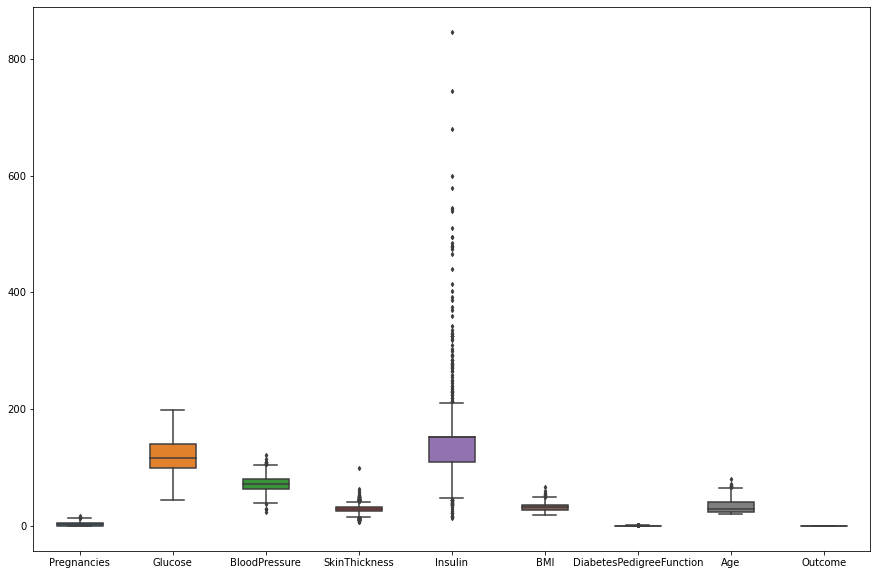

In [11]:
##########Ploting boxplot if there are any outliers######
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data1, width=0.5, ax=ax, fliersize=3)

In [12]:
###########Removing outliers from data of each column and checking if outliers have been removed using shape method#########
q = data1['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data1[data1['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

print(data_cleaned.shape)

data_cleaned.head()

(674, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,151.666735,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,151.666735,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.045762,151.666735,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,29.045762,151.666735,25.6,0.201,30.0,0.0


In [43]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
###########Seperating Features and target ######
features=data_cleaned.drop(columns='Outcome')
target= data_cleaned.Outcome

############Scaling features data###########
scalar = StandardScaler()
data1_scaled = scalar.fit_transform(features)


############The following code is used for Logistic regression with out randomized search cv######

x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)
log_reg_1= LogisticRegression()
log_reg_1.fit(x_train,y_train)
print('Accuracy for test data with out RandomizedSearchCV::::',log_reg_1.score(x_test,y_test))

log_reg_model_before_RSCV=log_reg_1


### The following code is for storing f1 score
y_pred=log_reg_1.predict(x_test)
print('Fl Score for Log Regression before RSCV ::::', f1_score(y_test,y_pred))
F1_LR_Before_RSCV= f1_score(y_test,y_pred)

print('-----------------------------------------------------------------------------')

##################################################################################################
# Following code is for Hyper parameter tuning for Logistic Regression with RandomizedSearchCV

# C represents the inverse of regularization strength
# l1 and l2 are penalities (lasso and ridge)
# saga is used for large data 
##################################################################################################

#C = np.logspace(0, 10, num=100)
#C=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
#c=[0.01,0.1,1.0]
C=[0.1,0.001,0.0001]
penalty = ['l2','l1']
solver = ['saga']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)
randomizedsearch = RandomizedSearchCV(log_reg_1, hyperparameters,random_state=155,verbose=1, n_jobs=-1,n_iter=100)

best_model_random = randomizedsearch.fit(x_train,y_train)
print('Best Estimator ::::',best_model_random.best_estimator_)
print('Best score::::', best_model_random.best_score_)
print('Best Params::::',best_model_random.best_params_)

print('-----------------------------------------------------------------------------')



Accuracy for test data with out RandomizedSearchCV:::: 0.813953488372093
Fl Score for Log Regression before RSCV :::: 0.6666666666666666
-----------------------------------------------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Estimator :::: LogisticRegression(C=0.1, penalty='l1', solver='saga')
Best score:::: 0.7688073394495414
Best Params:::: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}
-----------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished


In [45]:
##################################################################################################
# Following code is for finding model accuiracy for Logistic Regression after RandomizedSearchCV and for storing F1 score
##################################################################################################

log_reg_1=LogisticRegression(C=0.1, penalty='l1', solver='saga')

log_reg_1.fit(x_train,y_train)
print('Accuracy for Logistic Regression after RandomizedSearchCV :::: ', log_reg_1.score(x_test,y_test))

y_pred=log_reg_1.predict(x_test)
print('Fl Score for Log Regression after RSCV ::::', f1_score(y_test,y_pred))
F1_LR_After_RSCV= f1_score(y_test,y_pred)

######  The model accuracy after RandomizedSearchCV has increased from 0.8139534 to 0.829457 

Accuracy for Logistic Regression after RandomizedSearchCV ::::  0.8294573643410853
Fl Score for Log Regression after RSCV :::: 0.6857142857142856


In [46]:
from sklearn.neighbors import KNeighborsClassifier


x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)

##################################################################################################

# The following code is for finding accuracy for KNN with out RandomizedSearchCV

##################################################################################################

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Acuracy for KNN before RSCV::::', knn.score(x_test,y_test))

y_pred=knn.predict(x_test)
print('Fl Score for KNN before RSCV::::', f1_score(y_test,y_pred))
F1_KNN_Before_RSCV= f1_score(y_test,y_pred)
knn_model_before_RSCV=knn

print('---------------------------------------------------------------------------)


Acuracy for KNN before RSCV:::: 0.751937984496124
Fl Score for KNN before RSCV:::: 0.5897435897435899
-----------------------------------------------------------------------------


In [47]:

##################################################################################################
# Following code is for Hyper parameter tuning for KNN with RandomizedSearchCV
##################################################################################################

k_range=list(range(10,15))
param_random_2={ 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' :[11,12,13,14,15,16]            }  

randomizedsearch_2 = RandomizedSearchCV(knn, param_random_2, cv=20, scoring='accuracy', n_iter=1000, random_state=55)
randomizedsearch_2.fit(x_train, y_train)


print('Best Estimator ::::',randomizedsearch_2.best_estimator_)
print('Best score::::', randomizedsearch_2.best_score_)
print('Best Params::::',randomizedsearch_2.best_params_)

print('-----------------------------------------------------------------------------')


Best Estimator :::: KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
Best score:::: 0.7691137566137566
Best Params:::: {'n_neighbors': 14, 'leaf_size': 18, 'algorithm': 'ball_tree'}
-----------------------------------------------------------------------------


In [48]:
##################################################################################################
# Following code is for finding model accuiracy for KNN after RandomizedSearchCV and storing F1 score
##################################################################################################

knn=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
knn.fit(x_train,y_train)
print('Acuuracy for KNN after RSCV::::',knn.score(x_test,y_test))

y_pred=knn.predict(x_test)
print('Fl Score for KNN after RSCV::::', f1_score(y_test,y_pred))
F1_KNN_after_RSCV= f1_score(y_test,y_pred)

Acuuracy for KNN after RSCV:::: 0.7674418604651163
Fl Score for KNN after RSCV:::: 0.5945945945945946


In [50]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier


x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)



##################################################################################################

# The following code is for finding accuracy for Decisoin Tree with out RandomizedSearchCV

##################################################################################################

model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)
print('Accuracy for Decision Tree before RSCV::::', model_tree.score(x_test,y_test))

y_pred=model_tree.predict(x_test)
print('Fl Score for Decision Tree before RSCV::::', f1_score(y_test,y_pred))
F1_DT_Before_RSCV= f1_score(y_test,y_pred)

decision_tree_model_before_RSCV=model_tree

print('-----------------------------------------------------------------------------')

##################################################################################################
# Following code is for Hyper parameter tuning for Decision Tree with RandomizedSearchCV
##################################################################################################

param_dist_3 = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

random_search_3=RandomizedSearchCV(model_tree,param_dist_3,cv=10,random_state=355)

random_search_3.fit(x_train,y_train)

print('Best Estimator ::::',random_search_3.best_estimator_)
print('Best score::::', random_search_3.best_score_)
print('Best Params::::',random_search_3.best_params_)

print('-----------------------------------------------------------------------------')

Accuracy for Decision Tree before RSCV:::: 0.7286821705426356
Fl Score for Decision Tree before RSCV:::: 0.5882352941176471
-----------------------------------------------------------------------------
Best Estimator :::: DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=8, splitter='random')
Best score:::: 0.7520875420875421
Best Params:::: {'splitter': 'random', 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 7, 'criterion': 'entropy'}
-----------------------------------------------------------------------------


In [51]:

##################################################################################################
# Following code is for finding model accuiracy for Decision Tree after RandomizedSearchCV and storing F1 score
##################################################################################################

# 0.763367 and 0.80620
model_tree=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=8, splitter='random')

#model_tree=DecisionTreeClassifier(criterion = 'gini', max_depth =3, min_samples_leaf= 6, min_samples_split= 8, splitter ='best')
model_tree.fit(x_train,y_train)
print('Accuracy for Decision Treee after RSCV::::', model_tree.score(x_test,y_test))


y_pred=model_tree.predict(x_test)
print('Fl Score for Decision Tree after RSCV::::', f1_score(y_test,y_pred))
F1_DT_After_RSCV= f1_score(y_test,y_pred)


Accuracy for Decision Treee after RSCV:::: 0.8294573643410853
Fl Score for Decision Tree after RSCV:::: 0.7027027027027027


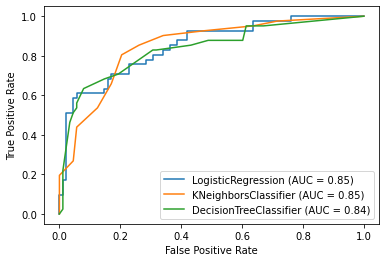

In [52]:
###################################################################################################################

# Following code is for plotting AUC and ROC curve for all 3 models i-e Logistic Regression, KNN and Decision Tree after Randomized Search CV

###################################################################################################################

from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(log_reg_1,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(model_tree,x_test,y_test,ax=disp.ax_)


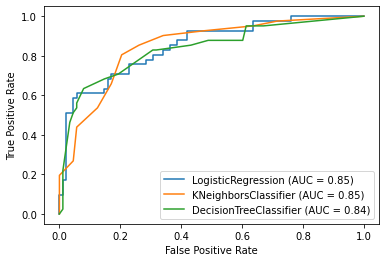

In [53]:
###################################################################################################################

# Following code is for plotting AUC and ROC curve for all 3 models i-e Logistic Regression, KNN and Decision Tree after Randomized Search CV

###################################################################################################################

from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(log_reg_1,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(model_tree,x_test,y_test,ax=disp.ax_)


(674, 8)


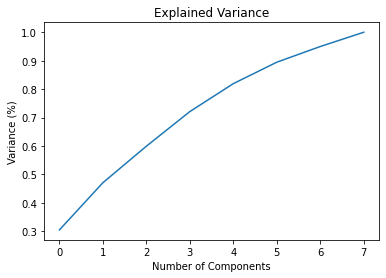

In [54]:

###################################################################################################################

# Following code is for plotting PCA figure to check if we can reduce the no of features and achieve better accuracy

###################################################################################################################

from sklearn.decomposition import PCA
print(data1_scaled.shape)


import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(data1_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()





In [57]:
# From the above figure , it is seen that for seven components itself, we can achieve maximum variance,
# but if we go for 6 componenets there is less variance achieved. Any ways we are trying PCA for both n=7 and n=6 and get the results

In [58]:
##################################################################################################

# The following code is for transforming our previous data(scaled data of features) into 7 components (columns/features) instead of 8 features 
# and see if we can achieve more accuracy

##################################################################################################

pca = PCA(n_components=7)
data1_scaled_1 = pca.fit_transform(data1_scaled)

principal_x = pd.DataFrame(data1_scaled_1,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7'])
principal_x


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7
0,1.944527,0.548036,0.302086,0.483886,-0.582683,0.485726,0.584902
1,-1.199585,-0.171191,-0.053912,-0.310534,-0.462633,-1.012239,0.570450
2,0.802954,1.227411,1.767187,0.054006,-0.798196,1.202896,0.574357
3,-2.233670,-0.151641,-0.644883,-0.526925,0.220222,-0.044525,-0.053271
4,-0.237700,0.673137,-0.186803,-0.908256,-0.295482,-0.434523,0.298618
...,...,...,...,...,...,...,...
669,3.004509,1.264230,-1.903176,-0.321159,-2.127497,-0.866582,1.036558
670,-0.132899,-0.864860,0.088716,-0.512170,0.090838,0.119027,-0.580210
671,-0.757774,1.048824,-0.176717,-0.515909,0.155605,0.270601,-0.034143
672,-0.021499,0.197116,0.511262,-0.471772,-0.649296,0.241394,0.804602


In [60]:
#################################################################################################

# The following code is for finding accuracy for Logistic Regression with PCA=7

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
print('Accuracy for Logistic Regression with PCA Before RSCV::::',logistic_model.score(x_test,y_test))

y_pred=logistic_model.predict(x_test)
F1_LR_Before_RSCV_with_PCA_7=f1_score(y_test,y_pred,average='macro')


Accuracy for Logistic Regression with PCA Before RSCV:::: 0.813953488372093


In [61]:

# The following code is for finding accuracy for KNN with PCA=7

##################################################################################################


x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.30, random_state= 355)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Accuracy for KNN with PCA before RSCV::::',knn.score(x_test,y_test))


y_pred=knn.predict(x_test)
F1_KNN_Before_RSCV_with_PCA_7=f1_score(y_test,y_pred,average='macro')



Accuracy for KNN with PCA before RSCV:::: 0.7487684729064039


In [62]:
##################################################################################################

# The following code is for finding accuracy for Decision Tree with PCA=7

##################################################################################################


from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.30, random_state= 355)

model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)
print('Accuracy for Decision Tree with PCA before RSCV::::',model_tree.score(x_test,y_test))

y_pred=model_tree.predict(x_test)
F1_DT_Before_RSCV_with_PCA_7=f1_score(y_test,y_pred,average='macro')


Accuracy for Decision Tree with PCA before RSCV:::: 0.7093596059113301


In [63]:
##################################################################

#   F1 scores for all 3 models in various possibilities:

#################################################################

In [64]:
print('F1 score for Logistic Regression before Randomized Search CV : ',F1_LR_Before_RSCV)
print('F1 score for Logistic Regression after Randomized Search CV : ',F1_LR_After_RSCV)
print('F1 score for KNN before Randomized Search CV : ',F1_KNN_Before_RSCV)
print('F1 score for KNN after Randomized Search CV : ',F1_KNN_after_RSCV)
print('F1 score for Decision Tree before Randomized Search CV : ',F1_DT_Before_RSCV)
print('F1 score for Decision Tree after Randomized Search CV : ',F1_DT_After_RSCV)

############# F1 scores with PCA =7

print('-------------------------------------------------------------------------')

print('F1 score for Logistic Regression before Randomized Search CV with PCA: ',F1_LR_Before_RSCV_with_PCA_7)
print('F1 score for KNN before Randomized Search CV with PCA: ',F1_KNN_Before_RSCV_with_PCA_7)
print('F1 score for Decision Tree before Randomized Search CV with PCA: ',F1_DT_Before_RSCV_with_PCA_7)


F1 score for Logistic Regression before Randomized Search CV :  0.6666666666666666
F1 score for Logistic Regression after Randomized Search CV :  0.6857142857142856
F1 score for KNN before Randomized Search CV :  0.5897435897435899
F1 score for KNN after Randomized Search CV :  0.5945945945945946
F1 score for Decision Tree before Randomized Search CV :  0.5882352941176471
F1 score for Decision Tree after Randomized Search CV :  0.7027027027027027
-------------------------------------------------------------------------
F1 score for Logistic Regression before Randomized Search CV with PCA:  0.7688172043010753
F1 score for KNN before Randomized Search CV with PCA:  0.7025769197621305
F1 score for Decision Tree before Randomized Search CV with PCA:  0.6675364330326163


In [65]:
# F1 score is maximumm for Logistic Regression before Randomized Search CV with PCA with value:  0.7688172043010753

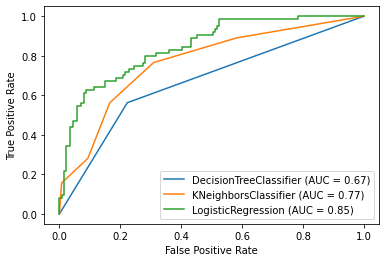

In [66]:
##################################################################################################

# The following code is for plotting roc curve for logistic, knn and decision tree with PCA=7

# The following code plots all roc curve to calculate AUC score for all the 3 models in same figure 

##################################################################################################



disp=plot_roc_curve(model_tree,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(logistic_model,x_test,y_test,ax=disp.ax_)

In [ ]:
##############################################################################

#    Final Analysis table:

##############################################################################
                     
                                           Logistic Regression         KNN                   Decision Tree


model acuuracy score with out PCA                  0.813953            0.751937                  0.728682

model accuracy with RandomizedSearchCV             0.829457            0.767441                  0.806201

model accuracy with PCA (n=7)                      0.813953            0.748768                  0.704433

model accuracy with PCA (n=6)                      0.813953            0.733990                  0.689655



AUC score without PCA                              0.84                0.77                      0.66

AUC score with RandomizedSeachCV                   0.85                0.85                      0.82

AUC score with PCA (n=7)                           0.85                0.77                      0.66

#################################################################

#           Conclusion with Analysis with points:

################################################################

PCA analysis(n=7):

1) For Logistic Regression, model accuracy is same for both i-e with PCA and without PCA and the value is 0.813953.
2) For KNN and Decision Tree, model accuracy has not improved with PCA

PCA analysis(n=6):

1) For Logistic Regression, model accuracy is same for both with PCA and without PCA and the value is 0.813953.
2) For KNN and Decision Tree, model accuracy has not improved with PCA

Model seleciton:

1) AUC score is highest both for Logistic Regression model with PCA (n=7) and KNN with Randomiozed search.Both has a value 0f 0.85 but model accuracy is  more for Logistic Regression than KNN. So we have to choose Logistic Regression with PCA (n=7). 

2) With PCA (n=7) is chosen as we are removoing one feature (originally 8 without PCA) , so the speed of execution will also be more.
Finally we need to check if we can perform Randomized search CV for PCA(n=7) to find the maximum model accuray that we can get.
Below code perfoms RSCV(Randomized Search CV) for PCA(n=7) for Logistic Regression.



In [68]:
##################################################################################################

# The following code splits the principal data and performs the Randomized Search CV for Logistic Regression with PCA (n=7)
# We are using same 'randomizedsearch' object that we used previously for Logistic Regression above

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

best_model_random = randomizedsearch.fit(x_train,y_train)
print('Best Estimator::::',best_model_random.best_estimator_)
print('Best score::::', best_model_random.best_score_)
print('Best Params::::',best_model_random.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Estimator:::: LogisticRegression(C=0.1, solver='saga')
Best score:::: 0.7688073394495414
Best Params:::: {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.3s finished


In [ ]:
#################################################################

############  Final Conclusion with Analysis    #################

#################################################################


We have to choose Logistic Regression with (PCA=7) and with Randomized Search CV because we have highest AUC score of 0.85 and better model accuracy score of 0.821705


In [70]:
##################################################################################################

#                                          EXTRA ANALYSIS

##################################################################################################

# I have applied Randomized Search CV for both KNN and Decision Tree with PCA(n=7) but the model accuracy scores after RSCV applied, are not better than Logistic Regresion with PCA|(n=7). Please find the code below.


In [72]:
##################################################################################################

# The following code splits the principal data and performs the Randomized Search CV for KNN with PCA (n=7)
# We are using same 'randomizedsearch_2' object that we used previously for KNN above

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

best_model_random = randomizedsearch_2.fit(x_train,y_train)
print('Best Estimator::::',best_model_random.best_estimator_)
print('Best score::::', best_model_random.best_score_)
print('Best Params::::',best_model_random.best_params_)

Best Estimator:::: KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
Best score:::: 0.7581349206349206
Best Params:::: {'n_neighbors': 14, 'leaf_size': 18, 'algorithm': 'ball_tree'}


In [73]:
##################################################################################################

# The following code finds the accuracy for Randomized Search CV for KNN with PCA (n=7)

##################################################################################################

knn=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
knn.fit(x_train,y_train)
print('Acuuracy for KNN with PCA after RSCV::::',knn.score(x_test,y_test))

Acuuracy for KNN with PCA after RSCV:::: 0.7829457364341085


In [74]:
##################################################################################################

# The following code splits the principal data and performs the Randomized Search CV for Decision Tree with PCA (n=7)
# We are using same 'random_search_3' object that we used previously for Decision Tree above

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

random_search_3.fit(x_train,y_train)
print('Best Estimator ::::',random_search_3.best_estimator_)
print('Best score::::', random_search_3.best_score_)
print('Best Params::::',random_search_3.best_params_)

print('-----------------------------------------------------------------------------')


Best Estimator :::: DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=8,
                       min_samples_split=3, splitter='random')
Best score:::: 0.7523232323232324
Best Params:::: {'splitter': 'random', 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_depth': 23, 'criterion': 'entropy'}
-----------------------------------------------------------------------------


In [75]:
##################################################################################################

# The following code finds the accuracy for Randomized Search CV for Decision Tree with PCA (n=7)

##################################################################################################

model_tree= DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=9,min_samples_split=5, splitter='best')
model_tree.fit(x_train,y_train)
print('Acuuracy for Decision Tree with PCA after RSCV::::',model_tree.score(x_test,y_test))

Acuuracy for Decision Tree with PCA after RSCV:::: 0.7131782945736435


In [ ]:
# NOTE:: Decision Tree Hyper Parameter tuning is giving different results that is different combinations when executed again and again.